# Cluster neurons

Ziqiang Wei

## Neurons show different responses to behavioral variables



<video controls src="activity_movie.mov" />

In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from scipy.io import loadmat
root_dir = 'Data/'
mat_b = loadmat(root_dir + 'behavioral_variables.mat');
mat_n = loadmat(root_dir + 'selected_neural_data.mat');
mat_c = loadmat(root_dir + 'colortable.mat');

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
visual_forward = mat_b['forward_stimuli']
visual_backward = mat_b['backward_stimuli']
swim_power = mat_b['swim_power']
neuron_act = mat_n['neural_response_matrix']

## Neurons show different responses to behavioral variables

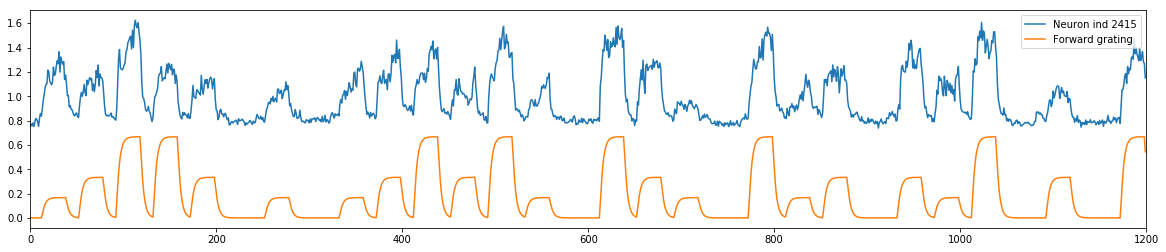

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(neuron_act[2414, :], label='Neuron ind 2415')
plt.plot(visual_forward.T/3, label='Forward grating')
plt.xlim([0, 1200])
plt.legend()
plt.show()

* The neural response is at the different dynamical range from the forward grating. How to unify them?
* The neural response seems highly modulated by the forward grating. How to measure the level of the modulation?
* How to compare the neural response to different contents of behavioral variables, such as gratings and swim?

## Unify the data -- z-score
The neural response is at the different dynamical range from the forward grating. How to unify them?


<h3><center>$z = \frac{x - \mu}{\sigma}$</center></h3>

* write your own function of z-score
* find existing funciton in matlab doing z-score
* do exercise 3.1 and 3.2

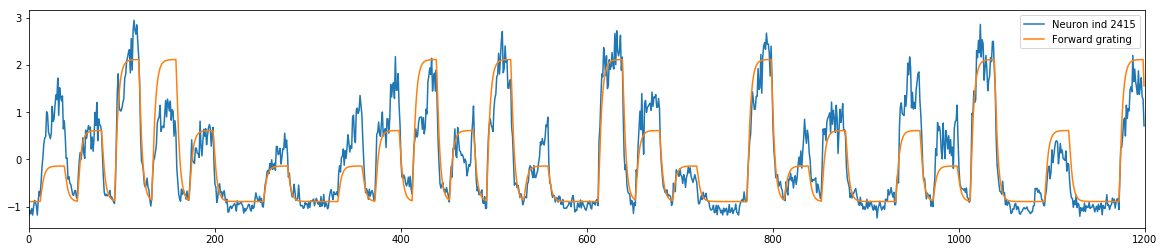

In [6]:
from scipy.stats.mstats import zscore
plt.figure(figsize=(20, 4))
plt.plot(zscore(neuron_act[2414, :]), label='Neuron ind 2415')
plt.plot(zscore(visual_forward.T/3), label='Forward grating')
plt.xlim([0, 1200])
plt.legend()
plt.show()

## Find relations between a behavioral variable and a neural response -- scatter plot
The neural response seems highly modulated by the forward grating. How to measure the level of the modulation?

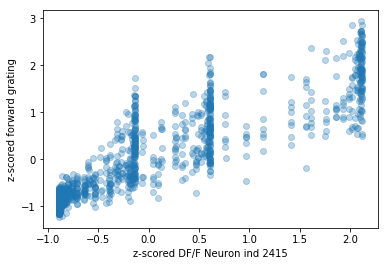

In [7]:
plt.scatter(zscore(visual_forward.T), zscore(neuron_act[2414, :]), alpha=0.3)
plt.xlabel('z-scored DF/F Neuron ind 2415')
plt.ylabel('z-scored forward grating')
plt.show()

## Quantify the linear relations between a behavioral variable and a neural response -- correlations
The neural response seems highly modulated by the forward grating. How to measure the level of the modulation?

<h3><center>$\rho_{X,Y} =\frac{\textrm{Cov}\left(X,Y\right)}{\sigma_X \sigma_Y }=\frac{E\left\lbrack \left(X-\mu_X \right)\left(Y-\mu_Y \right)\right\rbrack }{\sigma_X \sigma_Y }$</center></h3>

* write your own function of Pearson's correlation $\rho$
* find existing function in matlab doing Pearson's correlation
* compute correlation to a single behavioral variable (exercise 3.3)
* compute correlation to different behavioral variables (exercise 3.4)
* **create correlation map across the whole brain** (exercise 3.5)

## * Discussion: Quantify the relations between a behavioral variable and a neural response¶
The neural response seems highly modulated by the forward grating. How to measure the level of the modulation?

### Any other metrics?
* when the response is not linear to the input?
* when the distribution of response or input is skewed?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png)

## Quantify the contribution of a neural response from multiple behavioral variables
How to compare the neural response to different contents of behavioral variables, such as gratings and swim?

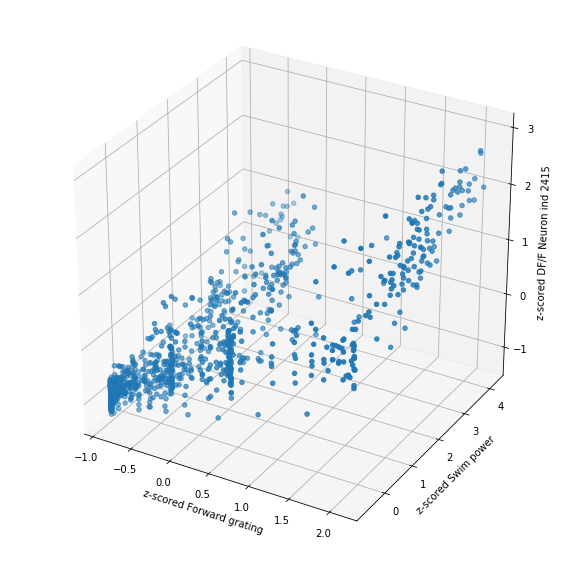

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore(visual_forward.T), zscore(swim_power.T), zscore(neuron_act[2414, :]))
ax.set_xlabel('z-scored Forward grating')
ax.set_ylabel('z-scored Swim power')
ax.set_zlabel('z-scored DF/F Neuron ind 2415')
plt.show()

## Quantify the contribution of a neural response from multiple behavioral variables -- Linear regression
How to compare the neural response to different contents of behavioral variables, such as gratings and swim?

<h3><center>$Y=\beta_0 +\beta_1 X_1 +\beta_2 X_2 +\beta_3 X_3 +\ldotp \ldotp \ldotp \ldotp$</center></h3>

* use `regress` function doing linear regression on neural activity to behavioral variables (excersie 3.6)
* try different functions in matlab

## Discussion: Quantify the contribution of a neural response from multiple behavioral variables

### Discussion #1 pairwise correlation vs linear regression
* Similarity
* Dissimilarity
* Pros and cons

### Discussion #2 what can be extended in regression?